In [1]:
#Labrary Definition [non mangiare troppo sennò ti scappa la cacca]
import cv22
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Load Scene
scene = cv22.imread('./scenes/e2.png',cv22.COLOR_BGR2RGB)

#Load Model
model = cv22.imread('./models/1.jpg',cv22.COLOR_BGR2RGB)


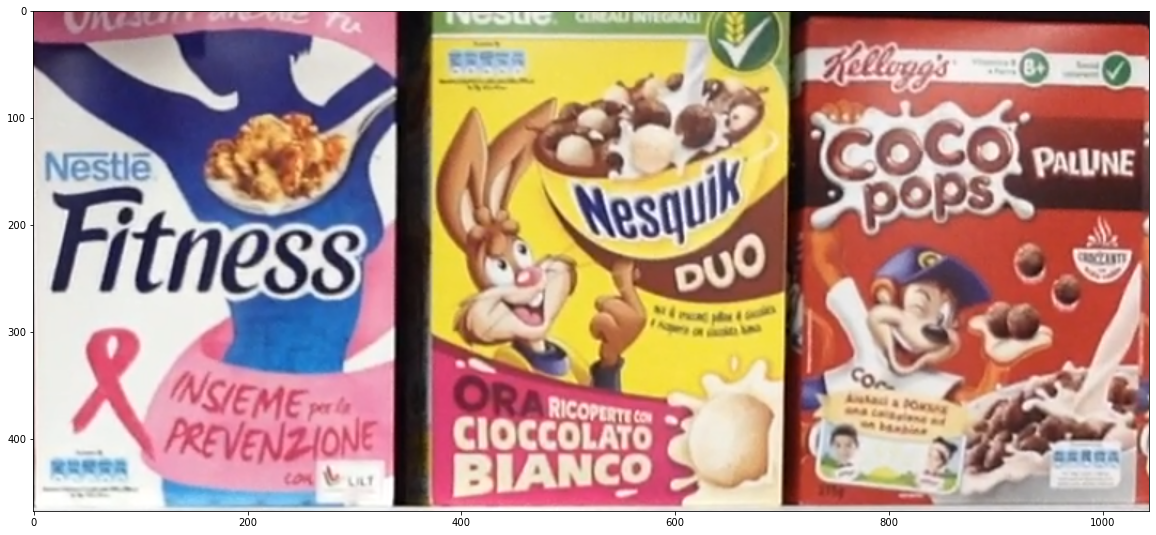

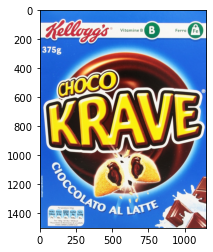

In [3]:
#Plot Scene
plt.figure(figsize=(20, 10)) 
plt.imshow(cv22.cv2tColor(scene,cv22.COLOR_BGR2RGB))

#Plot Model
plt.figure() 
plt.imshow(cv22.cv2tColor(model,cv22.COLOR_BGR2RGB))

In [4]:
sift = cv22.xfeatures2d.SIFT_create()
gray= cv22.cv2tColor(scene,cv22.COLOR_BGR2GRAY)
kp = sift.detect(scene,None)
print(kp[2].pt)
img=cv22.drawKeypoints(scene,kp,scene)

cv22.imwrite('sift_keypoints.jpg',img);

(11.577674865722656, 447.4804992675781)


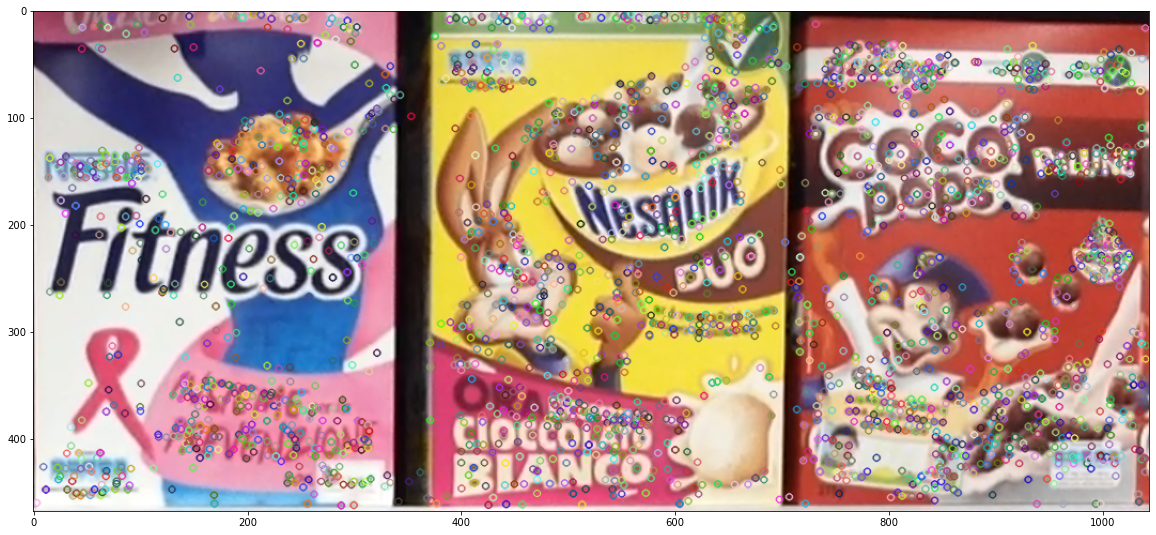

In [5]:
#Plot Scene
plt.figure(figsize=(20, 10)) 
plt.imshow(cv22.cv2tColor(scene,cv22.COLOR_BGR2RGB))

In [9]:
import numpy as np
import cv22
from matplotlib import pyplot as plt

img1 = cv22.imread('./models/1.jpg',cv22.COLOR_BGR2RGB) # queryImage
img2 = cv22.imread('./scenes/e3.png',cv22.COLOR_BGR2RGB) # trainImage
#percent by which the image is resized
scale_percent = 20
#calculate the 50 percent of original dimensions
width = int(img1.shape[1] * scale_percent / 100)
height = int(img2.shape[0] *3*scale_percent / 100)
# dsize
dsize = (width, height)
# resize image
img1 = cv22.resize(img1, dsize)

sift = cv22.xfeatures2d.SIFT_create()


FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv22.FlannBasedMatcher(index_params, search_params)
# Initiate SIFT detector

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)



# BFMatcher with default params
bf = cv22.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)
matches = flann.knnMatch(des1,des2,k=2)


# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.7 * n.distance:
        good.append(m)
print(m.queryIdx)
print(kp1[m.queryIdx].pt)

src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

#src_pts_size = np.float32([ des1[m.queryIdx].size for m in good ])
#dst_pts_size = np.float32([ des2[m.trainIdx].size for m in good ])


src_pts_size = np.float32([ kp1[m.queryIdx].size for m in good ])
dst_pts_size = np.float32([ kp2[m.trainIdx].size for m in good ])


ratio_of_sizes = src_pts_size / dst_pts_size
# cv22.drawMatchesKnn expects list of lists as matches.
img3 = cv22.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)

plt.figure(figsize=(30, 15))
plt.imshow(img3)
plt.show()

print(ratio_of_sizes)
print(src_pts_size)

516
(223.79627990722656, 145.6046142578125)


SystemError: <built-in function drawMatchesKnn> returned NULL without setting an error

In [ ]:
import numpy as np
import cv22 
from matplotlib import pyplot as plt
MIN_MATCH_COUNT = 10
img1 = cv22.imread('./models/5.jpg',cv22.COLOR_BGR2RGB) # queryImage
img2 = cv22.imread('./scenes/h1.jpg',cv22.COLOR_BGR2RGB) # trainImage
#percent by which the image is resized
scale_percent = 20
#calculate the 50 percent of original dimensions
width = int(img1.shape[1] * scale_percent / 100)
height = int(img2.shape[0] *3*scale_percent / 100)
# dsize
dsize = (width, height)
# resize image
img1 = cv22.resize(img1, dsize)

# Initiate SIFT detector
sift = cv22.xfeatures2d.SIFT_create(nfeatures=5000)
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv22.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)
# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)
        
        
        
        

        
        
        
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    h,w,d = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)
    img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None
    
    
    
    
    
    
    
    
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)
img3 = cv22.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
plt.figure(figsize=(30, 15)),plt.imshow(img3, 'gray'),plt.show()

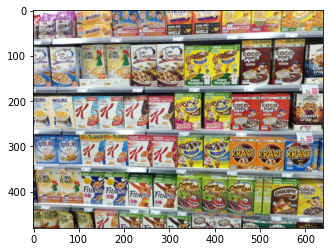

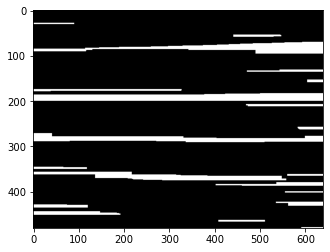

'\n# Step 1\nedges = cv2.adaptiveThreshold(vertical, 255, cv2.ADAPTIVE_THRESH_MEAN_C,                             cv2.THRESH_BINARY, 3, -2)\nshow_wait_destroy("edges", edges)\n# Step 2\nkernel = np.ones((2, 2), np.uint8)\nedges = cv2.dilate(edges, kernel)\nshow_wait_destroy("dilate", edges)\n# Step 3\nsmooth = np.copy(vertical)\n# Step 4\nsmooth = cv2.blur(smooth, (2, 2))\n# Step 5\n(rows, cols) = np.where(edges != 0)\nvertical[rows, cols] = smooth[rows, cols]\n# Show final result\nshow_wait_destroy("smooth - final", vertical)\n# [smooth]\n'

In [109]:
"""
@file morph_lines_detection.py
@brief Use morphology transformations for extracting horizontal and vertical lines sample code
"""
import numpy as np
from matplotlib import pyplot as plt
import math
img_path = './scenes/h3.jpg'
import numpy as np
import sys
import cv2
def show(img):
    #cv2.imshow(winname, img)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));

    plt.show()
    #cv2.moveWindow(winname, 500, 0)
    #cv2.waitKey(0)
    #cv2.destroyWindow(winname)
# [load_image]
# Check number of arguments

# Load the image
src = cv2.imread(img_path, cv2.IMREAD_COLOR)
# Check if image is loaded fine
#if src is None:
#    print ('Error opening image: ' + argv[0])
# Show source image
#cv2.imshow("src", src)
# [load_image]
# [gray]
# Transform source image to gray if it is not already

plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB));
plt.show()
if len(src.shape) != 2:
    gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
else:
    gray = src
# Show gray image
#show_wait_destroy("gray", gray)
# [gray]
# [bin]
# Apply adaptiveThreshold at the bitwise_not of gray, notice the ~ symbol
gray = cv2.bitwise_not(gray)
bw = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, \
                            cv2.THRESH_BINARY, 15, -2)
# Show binary image
#show_wait_destroy("binary", bw)
# [bin]
# [init]
# Create the images that will use to extract the horizontal and vertical lines
horizontal = np.copy(bw)
vertical = np.copy(bw)
# [init]
# [horiz]
# Specify size on horizontal axis
cols = horizontal.shape[1]
horizontal_size = cols // 20
# Create structure element for extracting horizontal lines through morphology operations
horizontalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (horizontal_size, 2))
# Apply morphology operations
horizontal = cv2.erode(horizontal, horizontalStructure)
#horizontal = cv2.erode(horizontal, horizontalStructure)
#horizontal = cv2.erode(horizontal, horizontalStructure)
#horizontal = cv2.erode(horizontal, horizontalStructure)



horizontal = cv2.dilate(horizontal, horizontalStructure)
horizontal = cv2.dilate(horizontal, horizontalStructure)
horizontal = cv2.dilate(horizontal, horizontalStructure)
horizontal = cv2.dilate(horizontal, horizontalStructure)
'''
horizontal = cv2.erode(horizontal, horizontalStructure)
horizontal = cv2.erode(horizontal, horizontalStructure)
horizontal = cv2.erode(horizontal, horizontalStructure)
horizontal = cv2.erode(horizontal, horizontalStructure)
'''
horizontal = cv2.dilate(horizontal, horizontalStructure)
horizontal = cv2.dilate(horizontal, horizontalStructure)


horizontal = cv2.erode(horizontal, horizontalStructure)
horizontal = cv2.erode(horizontal, horizontalStructure)
horizontal = cv2.erode(horizontal, horizontalStructure)
horizontal = cv2.erode(horizontal, horizontalStructure)
horizontal = cv2.erode(horizontal, horizontalStructure)
horizontal = cv2.erode(horizontal, horizontalStructure)
horizontal = cv2.erode(horizontal, horizontalStructure)

horizontal = cv2.dilate(horizontal, horizontalStructure)
horizontal = cv2.dilate(horizontal, horizontalStructure)
horizontal = cv2.dilate(horizontal, horizontalStructure)
horizontal = cv2.dilate(horizontal, horizontalStructure)

horizontal = cv2.erode(horizontal, horizontalStructure)
horizontal = cv2.erode(horizontal, horizontalStructure)

# Show extracted horizontal lines
show(horizontal)
'''
# [horiz]
# [vert]
# Specify size on vertical axis
rows = vertical.shape[0]
verticalsize = rows // 30
# Create structure element for extracting vertical lines through morphology operations
verticalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (1, verticalsize))
# Apply morphology operations
vertical = cv2.erode(vertical, verticalStructure)
vertical = cv2.dilate(vertical, verticalStructure)
# Show extracted vertical lines
#show_wait_destroy("vertical", vertical)
# [vert]
# [smooth]
# Inverse vertical image
vertical = cv2.bitwise_not(vertical)
show_wait_destroy("vertical_bit", vertical)
'''
'''
Extract edges and smooth image according to the logic
1. extract edges
2. dilate(edges)
3. src.copyTo(smooth)
4. blur smooth img
5. smooth.copyTo(src, edges)
'''
'''
# Step 1
edges = cv2.adaptiveThreshold(vertical, 255, cv2.ADAPTIVE_THRESH_MEAN_C, \
                            cv2.THRESH_BINARY, 3, -2)
show_wait_destroy("edges", edges)
# Step 2
kernel = np.ones((2, 2), np.uint8)
edges = cv2.dilate(edges, kernel)
show_wait_destroy("dilate", edges)
# Step 3
smooth = np.copy(vertical)
# Step 4
smooth = cv2.blur(smooth, (2, 2))
# Step 5
(rows, cols) = np.where(edges != 0)
vertical[rows, cols] = smooth[rows, cols]
# Show final result
show_wait_destroy("smooth - final", vertical)
# [smooth]
'''


In [57]:
import numpy as np
from matplotlib import pyplot as plt
import math
import numpy as np
import sys
import cv2

In [58]:
def show(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));
    plt.show()

In [142]:
# dictionary for hard scene features
h_scenes_images_features = {}
scenes_to_test = [1,2,3,4,5]
IMAGE_INDEX      = 0


# add features for each hard scene image
for i in scenes_to_test:
    scene_img = cv2.imread('./scenes/h{}.jpg'.format(i), cv2.COLOR_BGR2RGB)
    h_scenes_images_features[i] = [scene_img]

In [143]:
def get_horizontal_lines_of_image(scene_img_index, difficulty_scenes_images_features):
    # Load the image
    src = np.copy(difficulty_scenes_images_features[scene_img_index][IMAGE_INDEX])
    plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB));
    plt.show()
    # [gray]
    # Transform source image to gray if it is not already


    if len(src.shape) != 2:
        gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
    else:
        gray = src
    
    # Show gray image
    #show(gray)

    # [bin]
    # Apply adaptiveThreshold at the bitwise_not of gray, notice the ~ symbol
    gray = cv2.bitwise_not(gray)
    bw = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, \
                                cv2.THRESH_BINARY, 15, -2)
    # Show binary image
    #show(bw)

    # Create the images that will use to extract the horizontal and vertical lines
    horizontal = np.copy(bw)
    # [horiz]
    # Specify size on horizontal axis
    cols = horizontal.shape[1]
    horizontal_size = cols // 20

    # Create structure element for extracting horizontal lines through morphology operations
    horizontalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (horizontal_size, 2))

    # Apply morphology operations
    horizontal = cv2.erode(horizontal, horizontalStructure)
    horizontal = cv2.erode(horizontal, horizontalStructure)

    horizontal = cv2.dilate(horizontal, horizontalStructure)
    horizontal = cv2.dilate(horizontal, horizontalStructure)
    horizontal = cv2.dilate(horizontal, horizontalStructure)
    horizontal = cv2.dilate(horizontal, horizontalStructure)
    horizontal = cv2.dilate(horizontal, horizontalStructure)
    horizontal = cv2.dilate(horizontal, horizontalStructure)
    horizontal = cv2.dilate(horizontal, horizontalStructure)
    horizontal = cv2.dilate(horizontal, horizontalStructure)


    # Show extracted horizontal lines
    show(horizontal)
    return horizontal

In [154]:
def set_height_coord_of_shelves_in_scene_img(height_coord_of_shelves_in_all_scenes, horizontal_features_img):
    
    horiz_height = horizontal_features_img.shape[0]
    horiz_width = horizontal_features_img.shape[1]

    # image with horizontal features in which I will show the shelves in red
    horizontal_with_shelves_lines = np.copy(cv2.cvtColor(horizontal_features_img, cv2.COLOR_GRAY2RGB))
    # scene image in which I will show the shelves in red
    scene_img_with_shelves_lines = np.copy(h_scenes_images_features[j][IMAGE_INDEX])

    
    # cycle the pixels on the height of the image, with width = WIDTH_MEASURE 
    for height_coord in range(horiz_height):
        # I checked that in the horizontal image there are intensities which are only = 0 or = 255
        # if there is a white pixel in the along width = 100, and if the previous found pixel was black
        # then record the position of a shelf
        if( horizontal_features_img[height_coord, WIDTH_MEASURE] == 255 
           and horizontal_features_img[height_coord - 1, WIDTH_MEASURE] == 0 ):
            print(height_coord, WIDTH_MEASURE)
            # add the height coord of the found shelf in the list of the current scene, which is contained in the dictionary
            height_coord_of_shelves_in_all_scenes.setdefault(j, []).append(height_coord)
            horizontal_with_shelves_lines = cv2.line(horizontal_with_shelves_lines, (0, height_coord), 
                                                     (horiz_width, height_coord), (0,0,255), 3)
            
            scene_img_with_shelves_lines = cv2.line(scene_img_with_shelves_lines, (0, height_coord), 
                                                     (horiz_width, height_coord), (0,0,255), 3)

    show(horizontal_with_shelves_lines)
    show(scene_img_with_shelves_lines)
    

In [164]:
def get_shelves_images_from_scene_img(scene_img_index, shelves_images_of_scenes,
                                      height_coord_of_shelves_in_all_scenes, difficulty_scenes_images_features):
    
    MIN_HEIGHT_THAT_A_SHELF_SHOULD_HAVE = 20
    
    height_of_scene_img, width_of_scene_img = difficulty_scenes_images_features[scene_img_index][IMAGE_INDEX].shape[:2]
    
    for i, height_coord in enumerate(height_coord_of_shelves_in_all_scenes[scene_img_index]):
        # If Itake the first shelf, then I have to take the portion of image starting from 0 to its height coord
        if i == 0:
            # I consider a shelf good only if its height is >= of a min treshold
            if height_coord - 0 >= MIN_HEIGHT_THAT_A_SHELF_SHOULD_HAVE:
                shelves_images_of_scenes[scene_img_index] = {}
                shelves_images_of_scenes[scene_img_index][i] = \
                        difficulty_scenes_images_features[scene_img_index][IMAGE_INDEX][0:height_coord][0:width_of_scene_img]
        # If Itake the last shelf, then I have to take the portion of image starting from its height coord to
        # the height of the image
        elif i == len(height_coord_of_shelves_in_all_scenes[scene_img_index]) - 1:
            # I consider a shelf good only if its height is >= of a min treshold
            if height_of_scene_img - height_coord >= MIN_HEIGHT_THAT_A_SHELF_SHOULD_HAVE:
                shelves_images_of_scenes[scene_img_index][i] = \
                    difficulty_scenes_images_features[scene_img_index][IMAGE_INDEX][height_coord:height_of_scene_img]\
                    [0:width_of_scene_img]
        # else I take the portion of the image from its height coord to the next height coord
        else:
            next_height_coord = height_coord_of_shelves_in_all_scenes[scene_img_index][i+1]
            if next_height_coord - height_coord >= MIN_HEIGHT_THAT_A_SHELF_SHOULD_HAVE:
                shelves_images_of_scenes[scene_img_index][i] = \
                    difficulty_scenes_images_features[scene_img_index][IMAGE_INDEX][height_coord:next_height_coord]\
                    [0:width_of_scene_img]
            

________________________________________scene 1________________________________________



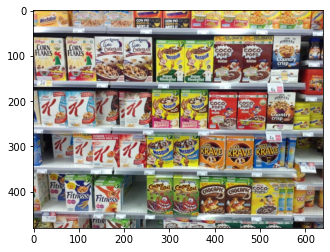

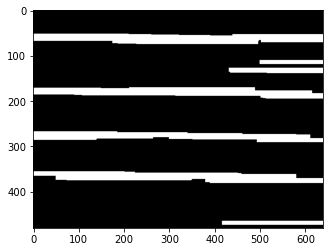

52 100
171 100
267 100
355 100


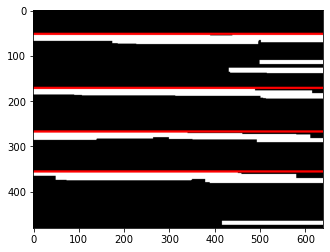

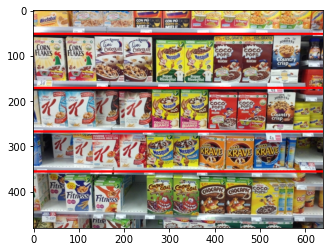

________________________________________scene 2________________________________________



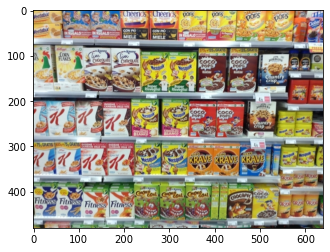

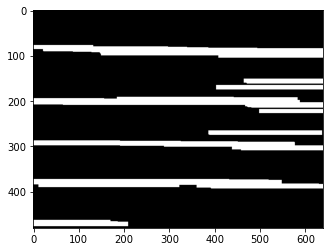

77 100
194 100
287 100
372 100
462 100


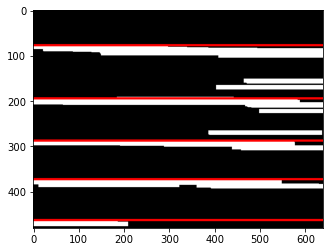

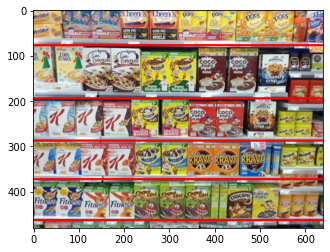

________________________________________scene 3________________________________________



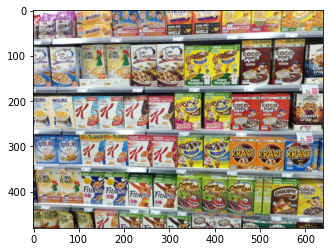

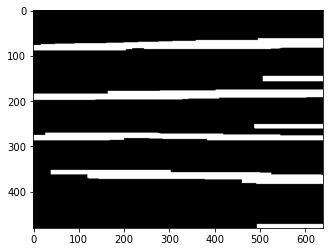

73 100
184 100
270 100
352 100


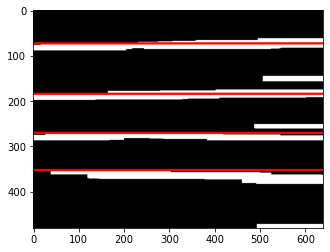

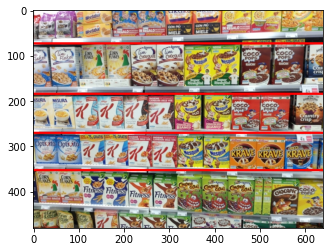

________________________________________scene 4________________________________________



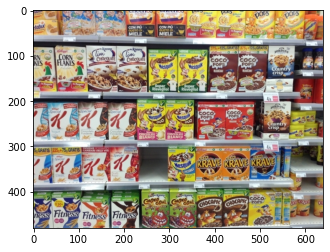

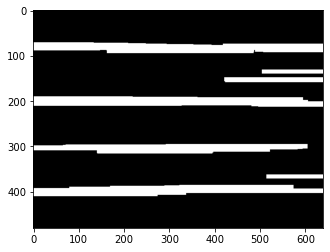

71 100
190 100
296 100
389 100


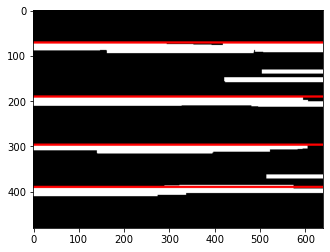

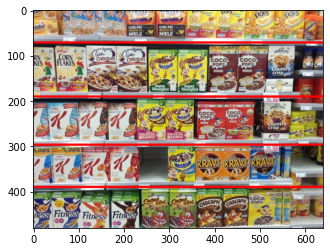

________________________________________scene 5________________________________________



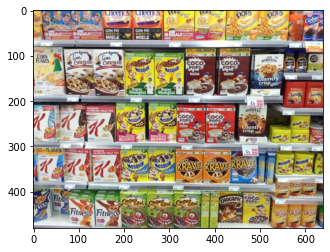

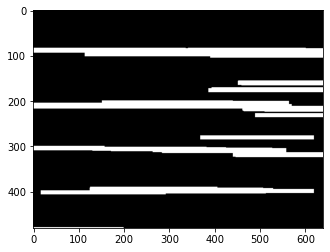

83 100
204 100
299 100
397 100
478 100


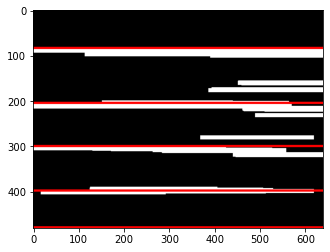

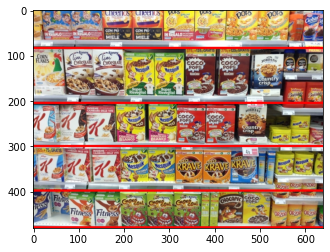

In [165]:
WIDTH_MEASURE = 100

# dictionary that will contain the height coordinate of every shelf in each scene image
height_coord_of_shelves_in_all_scenes = {}
scenes_to_test = [1,2,3,4,5]

shelves_images_of_scenes = {}


for j in scenes_to_test:
    print( ('_' * 40) + 'scene {}'.format(j) + ('_' * 40) + '\n')
    
    horizontal_features_img = get_horizontal_lines_of_image(j, h_scenes_images_features)
    
    set_height_coord_of_shelves_in_scene_img(height_coord_of_shelves_in_all_scenes, horizontal_features_img)
    
    get_shelves_images_from_scene_img(j, shelves_images_of_scenes,
                                      height_coord_of_shelves_in_all_scenes, h_scenes_images_features)



________________________________________scene 1________________________________________
(52, 640, 3)


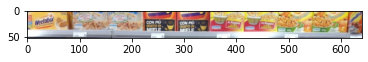

(96, 640, 3)


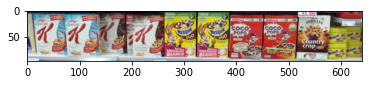

(88, 640, 3)


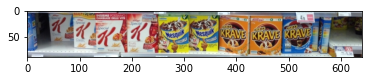

(125, 640, 3)


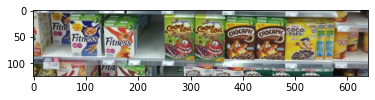

________________________________________scene 2________________________________________
(77, 640, 3)


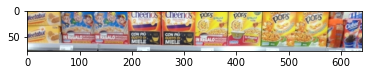

(93, 640, 3)


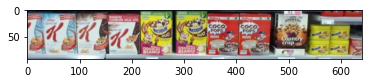

(85, 640, 3)


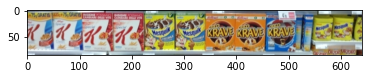

(90, 640, 3)


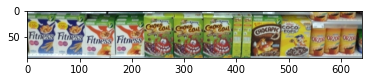

________________________________________scene 3________________________________________
(73, 640, 3)


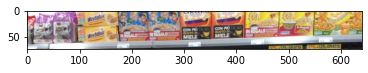

(86, 640, 3)


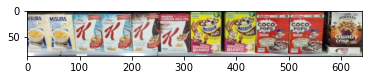

(82, 640, 3)


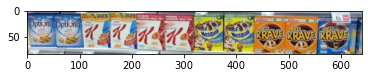

(128, 640, 3)


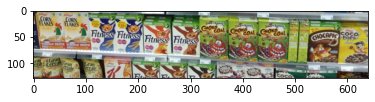

________________________________________scene 4________________________________________
(71, 640, 3)


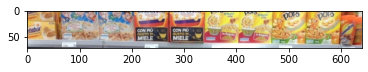

(106, 640, 3)


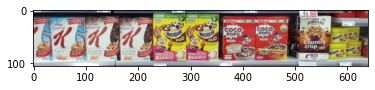

(93, 640, 3)


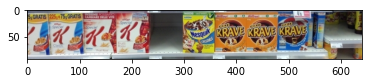

(91, 640, 3)


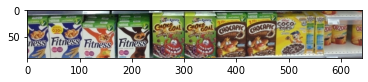

________________________________________scene 5________________________________________
(83, 640, 3)


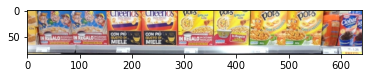

(95, 640, 3)


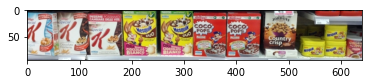

(98, 640, 3)


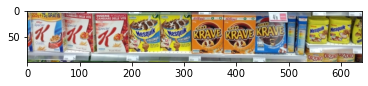

(81, 640, 3)


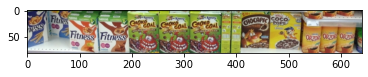

In [166]:
for scene_index, img_shelves_of_scene in shelves_images_of_scenes.items():
    print(('_' * 40) + 'scene {}'.format(scene_index) + ('_' * 40))
    for shelf_index, img_shelf in img_shelves_of_scene.items():
        print(img_shelf.shape)
        show(img_shelf)

In [161]:
print(shelves_images_of_scenes)

{1: {0: array([[[ 97, 146, 186],
        [ 96, 150, 191],
        [ 86, 153, 198],
        ...,
        [ 70,  92, 198],
        [ 66,  91, 195],
        [ 59,  86, 190]],

       [[ 87, 115, 150],
        [115, 151, 189],
        [119, 170, 213],
        ...,
        [ 76,  98, 194],
        [ 81, 100, 191],
        [ 91, 110, 197]],

       [[ 69,  58,  84],
        [ 75,  75, 105],
        [ 94, 113, 151],
        ...,
        [ 87, 107, 184],
        [121, 129, 189],
        [ 95,  95, 149]],

       ...,

       [[220, 215, 212],
        [217, 212, 209],
        [218, 214, 209],
        ...,
        [254, 244, 234],
        [255, 246, 236],
        [255, 247, 237]],

       [[ 73,  62,  58],
        [ 73,  62,  58],
        [ 73,  61,  55],
        ...,
        [253, 243, 233],
        [253, 242, 234],
        [253, 242, 234]],

       [[ 53,  41,  39],
        [ 48,  37,  33],
        [ 47,  35,  29],
        ...,
        [253, 243, 233],
        [239, 229, 219],
        [243, 23

In [120]:
print(height_coord_of_shelves_in_all_scenes)

{1: [52, 171, 267, 355], 2: [77, 194, 287, 372, 462], 3: [73, 184, 270, 352], 4: [71, 190, 296, 389], 5: [83, 204, 299, 397, 478]}
